\author{Rahul Bhatia}  

Author: Rahul Bhatia (rb3318)  
Due Wednesday, 10/14/20


In [161]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import time
%matplotlib inline

# Problem 1

Consider the model Soft-SVM, as defined in Shai & Shai
Model Definition:  
For Input:  
    $(X_i, Y_i)$ where $X \in \mathbb{R}^D$ and $Y \in \{0, 1\}$
Solve:  
    $$\underset{w}{min} \lambda ||w||^2 + L_s^{hinge}(w)$$  
    $$where \: L_s^{hinge}(w) = \dfrac{1}{m}\sum_{i=1}^{m}{max(0, 1 - y w^Tx)}$$
(Shai & Shai 172)

# Problem 2: Differentiation


## Part A

<center>
    $g(x) = Ax$ where $x\in \mathbb{R}^D$ $A^{KxD}$ and $K=1$
    $$g(x) = [A_{1,1}, A_{1,2},...A_{1,D}]   
    \begin{bmatrix}x_1\\x_2\\...\\x_d\end{bmatrix}$$
    $$g(x) = \sum_{i=1}^{D}{A_{1,i} x_i}$$
    $$\nabla{g} = \left[ \dfrac{\partial g}{\partial x_1} \dfrac{\partial g}{\partial x_2} ... \dfrac{\partial g}{\partial x_D}  \right]^T$$
    $$ \forall i \in [1 ... D] \dfrac{\partial g}{\partial x_i} = A_{1,i}$$
    $$ \nabla{g} = [A_{1,1} A_{1,2} ... A_{1,D}]^T $$
    $$ \nabla{g} = A^T $$
    
</center>

## Part B

for k > 1
$$ g(x) = Ax = [g_1(x)\; g_2(x) \; ... \; g_K(x)]$$  
$$\begin{bmatrix} g_1\\g_2\\...\\g_K \end{bmatrix}_{KxD}
  \begin{bmatrix} x_1\\x_2\\...\\x_D \end{bmatrix}_{Dx1} = \begin{bmatrix}g_1(x)\\g_2(x)\\...\\g_k(x)\end{bmatrix}_{KxD}$$

$$J = \begin{bmatrix}
    \dfrac{\partial g_1}{\partial x_1} & ... & \dfrac{\partial g_K}{\partial x_1} \\
    ... & & ... \\
    \dfrac{\partial g_1}{\partial x_D} & ... & \dfrac{\partial g_K}{\partial x_D} \\
\end{bmatrix} = [ \nabla g_1 \nabla g_2 ... \nabla g_K]$$
The columns of Jacobian are the gradients of $g_1, ... g_K$ the rows of $Ax$  
$$ J_{i,j} = \dfrac{\partial g_i}{\partial x_j} = \dfrac{\partial}{\partial x_j} \sum_{j=1}^{D}{A_{ij}x_j} = A_{ij}$$
Therefore $J_g(x) = A$

## Part C
$$ g(x) = x^TAx = \sum_{i=1}^{D} \sum_{j=1}^{D} A_{i,j} {x_i x_j} $$  
  
$$ \dfrac{\partial g}{\partial x_l} = \dfrac{\partial}{\partial x_l} \left[ \sum_{i=1}^{D}{A_{i,l}{x_i}{x_l}} + \sum_{j=1}^{D}{A_{l,j}{x_l}{x_j}}  \right] $$  
$$ \dfrac{\partial g}{\partial x_l} = \sum_{i=1}^{D}{A_{i,l}{x_i}} + \sum_{j=1}^{D}{A_{l,j}{x_j}} $$  
Expanding for all $l \in K$
$$\nabla g = \begin{bmatrix}
\sum_{i=1}^D{A_{i,1} x_i} \\
\sum_{i=1}^D{A_{i,2} x_i} \\
... \\
\end{bmatrix} + \begin{bmatrix}
\sum_{j=1}^D{A_{1,j} x_j} \\
\sum_{j=1}^D{A_{2,j} x_j} \\
... \\
\end{bmatrix}$$  
$$ \nabla g = Ax + A^Tx $$



# Problem 3: Compare Gradient Descent method and Newton Methods

In [133]:
sigma = np.array([[5, 0], [0, 0.5]])
one = np.array([[1, 1]])


def func(x):
    return (
        np.dot(np.dot(x.transpose(), sigma), x)
        + math.log(1 + math.exp(-np.dot(one, x)))
    )


def first_deriv(x):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1 + x2))
    return np.array([[10 * x1 - ex / (1 + ex)], [x2 - ex / (1 + ex)]])


def second_deriv(x):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-(x1 + x2))
    ex = ex / (1 + ex) ** 2
    return np.array([[10 + ex, ex], [ex, 1 + ex]])

## Newton's Method with constant step size $\eta$ = 1

In [162]:
# Newton's Method
eta = 1
x_t = np.zeros((30, 2, 1))
for t in np.arange(1, 30):
    x_t[t] = x_t[t - 1] - eta * np.matmul(
        np.linalg.inv(second_deriv(x_t[t - 1])),
        first_deriv(x_t[t - 1]))
F_t = pd.Series([func(x)[0][0] for x in x_t]).rename("NM1")

## Gradient Descent Method with constant step sizes $\eta = 0.1, 0.19, 0.20$

In [166]:
def gradient_descent(eta) -> pd.Series:
    x_t = np.zeros((30, 2, 1))
    for t in np.arange(1, 30):
        x_t[t] = x_t[t - 1] - eta * first_deriv(x_t[t - 1])

    return pd.Series([func(x)[0][0] for x in x_t])


GD01 = gradient_descent(0.1).rename("GD01")
GD019 = gradient_descent(0.19).rename("GD019")
GD02 = gradient_descent(0.20).rename("GD02")

Text(0.5, 0, 'steps')

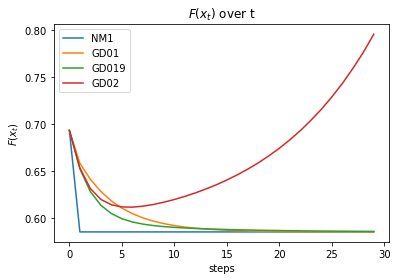

In [174]:
ax = pd.DataFrame([F_t, GD01, GD019, GD02]).T.plot()
ax.set_title("$F(x_t)$ over t")
ax.set_ylabel("$F(x_t)$")
ax.set_xlabel("steps")

# Problem 4: Taylor’s Remainder Theorem

Start with Taylor Expansion of F(x) at $x$  
$$ F(x^*) = F(x) + (x^* - x)^T \nabla F(x) + (x^* - x)^T \nabla^2 F(x) (x^* - x) $$
$$ F(x) - F(x^*) = (x - x^*)^T \nabla F(x) - (x^* - x)^T \nabla^2 F(x) (x^* - x) $$

From given that $\nabla^2F \succeq 0$, we know $z^T \nabla^2 F z \ge 0$  
$$ let \; K = (x - x^*)^T \nabla^2 F(x) (x - x^*), \; K \ge 0 $$  
$$  F(x) - F(x^*) = (x - x^*)^T \nabla F(x) - K $$
Since $ K > 0 $
$$  F(x) - F(x^*) \le (x - x^*)^T \nabla F(x) $$


# Problem 5: Regular SGD vs Adagrad optimization on a Regression Problem

## (A) What is $\tilde{\nabla}F(w_{t})$ in terms of $(X_t, Y_t)$ and $w_t$?

$$ \tilde{\nabla}F(w_t) = \dfrac{2}{n}\left[-(Y_i - w^T X_i) X_i + \lambda w\right]$$

## (B) Implementations, using $\beta = 2(\sigma_1^2 + \lambda)$

### Regular SGD

In [284]:
def sgd(X, y, penalty, beta):
    """Stochastic Gradient Descent"""
    n = len(y)
    W_t = np.zeros((n + 1, 10, 1))
    nabla_F_t = np.zeros((n + 1, 10, 1))
    sigma_t_2 = np.zeros(n + 1)
    for i in range(0, n):
        X_i = np.reshape(X[i], (10, 1))
        nabla_a = -2 * (y[i] - np.matmul(W_t[i].T, X_i)) * X_i
        nabla_b = 2 * penalty * W_t[i]
        nabla_F_t[i] = (1 / n) * (nabla_a + nabla_b)
        sigma_t_2 = np.sum([np.dot(nabla_F.T, nabla_F) for nabla_F in nabla_F_t])
        eta_t = np.sqrt(1 / (beta * sigma_t_2))
        W_t[i + 1] = W_t[i] - eta_t * nabla_F_t[i]
    return W_t

### Autograd

In [345]:
def autograd(X, y, penalty, beta):
    """Autograd"""
    d = 10
    n = len(y)
    W_t = np.zeros((n + 1, d, 1))
    nabla_F_t = np.zeros((n + 1, d, 1))
    sigma_t_i_2 = np.zeros((n + 1, d, 1))
    eta_t_i = np.zeros((n + 1, d, 1))
    for t in range(0, n):
        X_i = np.reshape(X[t], (d, 1))
        nabla_a = -2 * (y[t] - np.matmul(W_t[t].T, X_i)) * X_i
        nabla_b = 2 * penalty * W_t[t]
        nabla_F_t[t] = (1 / n) * (nabla_a + nabla_b)
        sigma_t_i_2[t] = np.array([
            [np.sum([nabla_F[i]**2 for nabla_F in nabla_F_t])]
            for i in np.arange(d)])
        eta_t_i[t] = np.sqrt(1 / (beta * sigma_t_i_2[t]))
        W_t[t + 1] = W_t[t] - np.matmul(np.diag(eta_t_i[t].reshape(10)), nabla_F_t[t])
    return W_t

## (C) Experiment

In [217]:
## Code for generator/sampler
sigma = 1
d = 10
c_square = 100
cov = np.diag([(0.25 ** i) * c_square for i in range(1, d + 1)])
mean = [0] * d
w = np.array([1] * d)


def sampler(n):
    np.random.seed(int(time.time() * 100000) % 100000)
    X = np.array(np.random.multivariate_normal(mean, cov, n))
    Y = np.matmul(X, w) + np.random.normal(0, sigma ** 2, n)
    return (X, Y)

In [350]:
samples = []
for iteration in range(10):
    penalty = 0.1
    X, y = sampler(1000)
    W_t_sgd = sgd(X, y, penalty=penalty, beta=2 * (cov[0][0] + penalty))
    W_t_sgd_series = pd.Series([np.linalg.norm(W_t, 2)
                                for W_t in W_t_sgd - np.ones(W_t_sgd.shape)])
    samples.append(W_t_sgd_series
                   .rename("dist")
                   .reset_index()
                   .rename(columns=dict(index='t'))
                   .assign(iteration=iteration, optimizer='sgd'))
    W_t_autograd = autograd(X, y, penalty=penalty, beta=2 * (cov[0][0] + penalty))
    W_t_autograd_series = pd.Series(
        [np.linalg.norm(W_t, 2)
         for W_t in W_t_autograd - np.ones(W_t_autograd.shape)])
    samples.append(W_t_autograd_series
                   .rename("dist")
                   .reset_index()
                   .rename(columns=dict(index='t'))
                   .assign(iteration=iteration, optimizer='autograd'))

all_samples = pd.concat(samples)

In [351]:
ax = sns.lineplot(x='t', y='dist', hue='optimizer', data=all_samples);